# <center><ins>Business Case: "Netflix" - Data Exploration and Visualisation</ins></center>

<img src="https://storage.googleapis.com/kaggle-datasets-images/2178661/3637122/3598f9ebf3b0c8ecd6e10090005d911b/dataset-cover.jpg?t=2022-05-15-00-07-35" width=1000 height=350>

**<ins>Dataset Description:</ins>**       
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


**<ins>Dataset:</ins>**        
The dataset provided consists of a list of all the TV shows/movies available on Netflix:
* **Show_id:** Unique ID for every Movie / Tv Show
* **Type:** Identifier - A Movie or TV Show
* **Title:** Title of the Movie / Tv Show
* **Director:** Director of the Movie
* **Cast:** Actors involved in the movie/show
* **Country:** Country where the movie/show was produced
* **Date_added:** Date it was added on Netflix
* **Release_year:** Actual Release year of the movie/show
* **Rating:** TV Rating of the movie/show
* **Duration:** Total Duration - in minutes or number of seasons
* **Listed_in:** Genre
* **Description:** The summary description

**<ins>Dataset Link:</ins>**       
https://www.kaggle.com/shivamb/netflix-shows

**<ins>Colab Link for code:</ins>**          
https://colab.research.google.com/drive/1ikQ2uP2ltBjfCvNWEeHKebOOmoXy43pz?usp=sharing

# **(1) Defining Problem Statement and Analyzing Basic Metrics**
***

The main objective of this project is to analyze the dataset of movies and TV shows available on **Netflix** and generate insights to help **Netflix** decide which type of content to produce and how to grow the business in different countries. The analysis should be data-driven, focusing on basic metrics and visualizations to support the findings.


# **(2) Import libraries and Load the dataset**
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings & make code more representable
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load netflix.csv dataset into a pandas dataFrame
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

In [3]:
# shows the top 5 records of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# NOTE: If the original dataset did not have any headers/column-name, then we can update the respective column-name for the dataset as below:
# df.columns = ["show_id","type","title",	"director",	"cast",	"country","date_added",	"release_year",	"rating",	"duration",	"listed_in","description"]
# df.columns

# **(3) Data Exploration and Pre-processing**
***

### **Check basic metrics and data types**

Understanding the structure of the dataset, including the number of rows and columns, and the data types of each attribute. It is a crucial step in **data exploration.**

In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observations:**
* The dataset consists of 8807 rows with 12 columns.
* We can see that columns like "show_id", "type", "title", "director", "cast", "country", "date_added", "rating", "duration", "listed_in", and "description" contain string values, which are represented using the **"object"** datatype in this dataframe.
* Only the column "release_year" seem to be having the **"integer**" datatype

### **Statistical Summary of numerical type data**

In [7]:
# Describing the statistical summary of numerical type data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Observation:**     
* 25% of the tolal data belongs to year 1925-2013
* 25% of the tolal data belongs to year 2019-2021
* In an overall, the dataframe consists of release year starting from 1925 until the year 2021

**Insight:**
* The **Netflix** still having old data and should add latest Movies and TV shows to attract more customers as well as retain the existing once.

### **Statistical Summary of categorical type data**

In [8]:
# Statistical summary of categorical type data
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Observations:**
* We can see that "show_id" and "title" are the **unique** factors.
* **Missing values** in "director", "case", "country", date_added", and "duration" columns.
* The "type", "rating" and "country" columns needs to be changed to **categorical** data
* The country "United States" is having the **maximun content** available.

### **Check for missing values**

This is both a **data cleaning** and **data preprocessing** step. Identifying and handling missing values is considered **data cleaning** since it involves addressing the issue of incomplete data. Depending on the extent of missing data, you may need to decide how to handle it, either by imputing values or removing the affected rows/columns. Additionally, it is also a **data preprocessing** step since having missing values can impact the effectiveness of subsequent analyses, and addressing them helps ensure the data is in a suitable form for analysis.

In [9]:
# Display the count of missing values for each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Calculate the missing values percentage for each column and round to two decimal places
missing_values_percentage = (df.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:\n")
print(missing_values_percentage)

Missing Values Percentage:

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64


**Observation:**
* We can see that **around 30%** of the "director" columns value are missing and hence we cannot drop this much data. We will fill these columns with "Unknown"
* Likewise we have "cast" and "country" columns having **almost 10%** data of missing values.

### **Handling null values**

In [11]:
# Handling null values for categorical variables
categorical_columns = ['cast', 'director', 'country', 'rating']
for column in categorical_columns:
    df[column].fillna('Unknown_' + column, inplace=True)

In [12]:
# Filling up the missing values with the value as "Unknown"
# df[["director","cast","country"]] = df[["director","cast","country"]].fillna("Unknown")

In [13]:
# Handling null values for continuous variables
continuous_columns = ['duration']
for column in continuous_columns:
    df[column].fillna(0, inplace=True)

In [14]:
# Display the count of missing values for each column
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

**Observation:**
* We see that we still have few **missing values** in "date_added"column. We will drop these rows in which "date_added" values are missing when we will do the analysis related to date column.

### **Unnesting columns**

In the context of data preprocessing, **"unnesting"** refers to the process of converting nested data into a flat or unnested format. It is often necessary when dealing with data that contains lists, arrays, or other nested structures within a single column.

In [15]:
# Approach (1): Using Direct Assignment and explode

# Unnesting "cast" column
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')

# Unnesting "director" column
df['director'] = df['director'].str.split(', ')
df = df.explode('director')

# Unnesting "country" column
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Now, the "cast," "director," & "country" columns are unnested, & each row contains a single element in those columns...

In [16]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**Observatiion:**    
* The "cast", "director", and "country" columns has been unnested due to which we now havfe a total number of **89382 rows with 12 columns** in this dataframe.

In [17]:
# Approach (2): Using Lambda and apply
'''
df['cast'] = df['cast'].apply(lambda x: x.split(', '))
df = df.explode('cast')

df['director'] = df['director'].apply(lambda x: x.split(', '))
df = df.explode('director')

df['country'] = df['country'].apply(lambda x: x.split(', '))
df = df.explode('country')

'''

"\ndf['cast'] = df['cast'].apply(lambda x: x.split(', '))\ndf = df.explode('cast')\n\ndf['director'] = df['director'].apply(lambda x: x.split(', '))\ndf = df.explode('director')\n\ndf['country'] = df['country'].apply(lambda x: x.split(', '))\ndf = df.explode('country')\n\n"

In [18]:
# df

### **Convert categorical attributes to 'category' data type**

Converting categorical attributes to the 'category' data type is a **data preprocessing** step. By doing so, you are optimizing the memory usage and potentially speeding up certain operations when dealing with categorical data.

In [19]:
# Converting the columns 'type', 'country', and 'rating' in the dataframe 'df' to the 'category' data type
df['type'] = df['type'].astype('category')
df['country'] = df['country'].astype('category')
df['rating'] = df['rating'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       89382 non-null  object  
 1   type          89382 non-null  category
 2   title         89382 non-null  object  
 3   director      89382 non-null  object  
 4   cast          89382 non-null  object  
 5   country       89382 non-null  category
 6   date_added    89313 non-null  object  
 7   release_year  89382 non-null  int64   
 8   rating        89382 non-null  category
 9   duration      89382 non-null  object  
 10  listed_in     89382 non-null  object  
 11  description   89382 non-null  object  
dtypes: category(3), int64(1), object(8)
memory usage: 7.2+ MB


**Observatiion:**    
* The "type", "country", "rating" columns datatype has been corrected to **"Category"** in this dataframe.
* The column "release_year" seem to be having the **"integer**" datatype
* Rest of the columns contain string values, which are represented using the **"object"** datatype in this dataframe.

### **Convert date and time attributes to 'date_time' data type**

Converting date and time attributes to the 'date_time' data type is a **data preprocessing** step.

In [21]:
# Convert 'date_added' column to datetime data type
df['date_added'] = pd.to_datetime(df['date_added'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       89382 non-null  object        
 1   type          89382 non-null  category      
 2   title         89382 non-null  object        
 3   director      89382 non-null  object        
 4   cast          89382 non-null  object        
 5   country       89382 non-null  category      
 6   date_added    89313 non-null  datetime64[ns]
 7   release_year  89382 non-null  int64         
 8   rating        89382 non-null  category      
 9   duration      89382 non-null  object        
 10  listed_in     89382 non-null  object        
 11  description   89382 non-null  object        
dtypes: category(3), datetime64[ns](1), int64(1), object(7)
memory usage: 7.2+ MB


**Observatiion:**   
* The "date_added" column's datatype has been updated to the right **"date_time**" format in this dataframe.
* The "type", "country", "rating" columns datatype has been corrected to **"Category"**.
* The column "release_year" seem to be having the **"integer**" datatype
* Rest of the columns contain string values, which are represented using the **"object"** datatype in this dataframe.

### **Convert numeric attributes to 'int' data type**

Converting numeric attributes to the 'integer' data type is a **data preprocessing** step.

In [23]:
# Custom function to convert duration to numeric
def convert_duration(duration):
    if 'Season' in str(duration):
        return int(str(duration).split()[0])  # Extract the numeric value for 'Seasons'
    return int(str(duration).replace(' min', ''))  # Convert 'min' entries to integers


In [24]:
# Convert 'duration' column to numeric using the custom function
df['duration'] = df['duration'].apply(convert_duration)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       89382 non-null  object        
 1   type          89382 non-null  category      
 2   title         89382 non-null  object        
 3   director      89382 non-null  object        
 4   cast          89382 non-null  object        
 5   country       89382 non-null  category      
 6   date_added    89313 non-null  datetime64[ns]
 7   release_year  89382 non-null  int64         
 8   rating        89382 non-null  category      
 9   duration      89382 non-null  int64         
 10  listed_in     89382 non-null  object        
 11  description   89382 non-null  object        
dtypes: category(3), datetime64[ns](1), int64(2), object(6)
memory usage: 7.2+ MB


# **(4) Data Analysis**
***

### **(Q1) Find the counts of each categorical variable both using graphical and non-graphical analysis.**

To perform both **non-graphical** and **graphical analysi**s to find the counts of each categorical variable, you can use the **value_counts()** method for **non-graphical analysis** and the **countplot()** function from the **seaborn** library for **graphical analysis**.

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


#### **Non-Graphical Analysis**

**Non-graphical analysis** refers to the exploration and examination of data without using visualizations. In the contect, we loop through each categorical column and use the **value_counts()** method to get the counts of each category in that column. Additionally, we use the **unique()** method to get the unique attributes for each categorical column.

In [27]:
# Categorical variables to analyze
categorical_columns = ['type', 'country', 'rating']

In [28]:
# Non-graphical analysis (value counts of each category for the given column)
for column in categorical_columns:
    print(f"Column: {column}\n")
    print(df[column].value_counts(), "\n")
    print(f"Unique Values: {df[column].unique()}")
    print("\n--- --- --- --- --- --- --- --- --- ---")  # Separate the output for different columns

Column: type

Movie      65346
TV Show    24036
Name: type, dtype: int64 

Unique Values: ['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

--- --- --- --- --- --- --- --- --- ---
Column: country

United States      30471
India               8537
United Kingdom      5713
Unknown_country     5421
Canada              3946
                   ...  
Afghanistan            1
Samoa                  1
Sri Lanka              1
Palestine              1
Panama                 1
Name: country, Length: 128, dtype: int64 

Unique Values: ['United States', 'South Africa', 'Unknown_country', 'India', 'Ghana', ..., 'Sudan', 'Panama', 'Uganda', 'East Germany', 'Montenegro']
Length: 128
Categories (128, object): ['', 'Afghanistan', 'Albania', 'Algeria', ..., 'Venezuela',
                           'Vietnam', 'West Germany', 'Zimbabwe']

--- --- --- --- --- --- --- --- --- ---
Column: rating

TV-MA             29860
TV-14             17437
R                 12865
PG-13              7814
T

#### **Graphical Analysis**

In **Graphical Analysis**, we loop through each **categorical column** and creating a count plot using **seaborn's countplot()** function. Each count plot visually displays the counts of each category in a **bar chart**, showing the distribution of categorical data in the DataFrame.

In [29]:
# Categorical variables to analyze graphically
categorical_columns = ['type', 'rating']

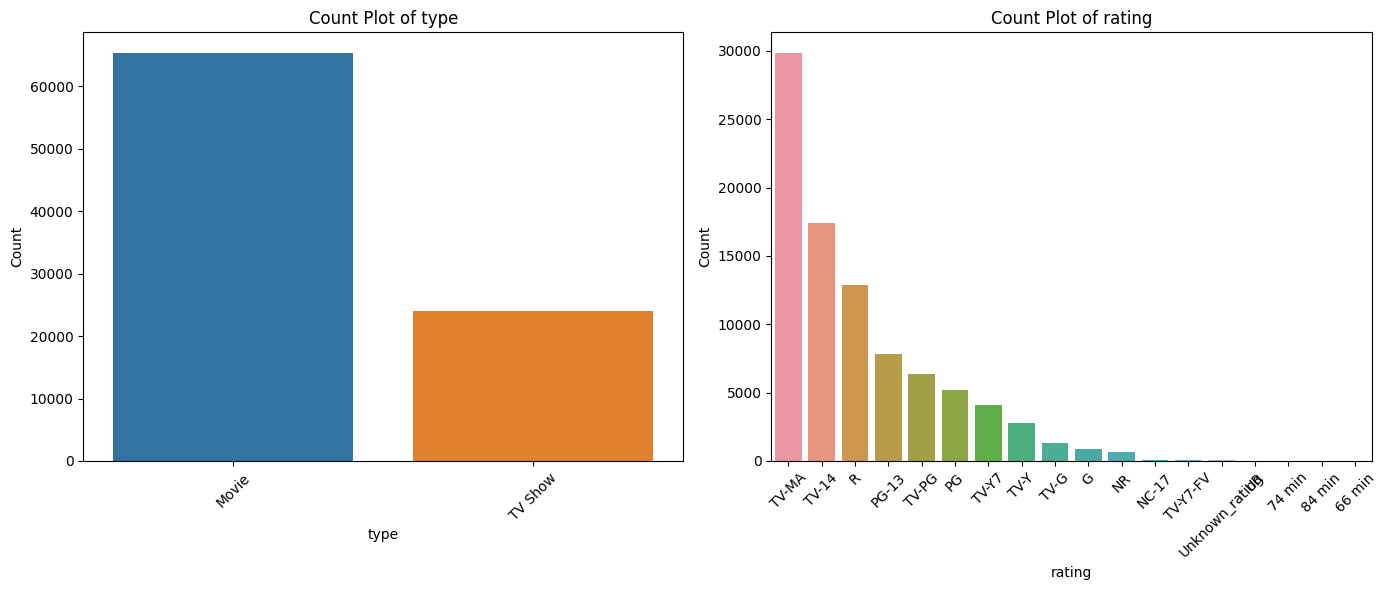

In [30]:
# Create subplots for graphical analysis
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(14, 6))

# Graphical analysis for each categorical variable
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observations:**

* The **count plot** for the **'type'** variable shows that there are two types of content: **'Movie'** and **'TV Show'**. It appears that the dataset contains **more movies than TV shows**.
* As per the **'rating' Count Plot**, we can see the distribution of different content ratings. The **most common rating** seems to be 'TV-MA', followed by 'TV-14' and 'R'. There are also several other ratings with varying frequencies.

**Actionable Recommendations:**

* **Content Balance:** As there are **more movies than TV shows** in the dataset, content creators could **focus on producing a balanced mix of both types** to cater to **diverse audience preferences**.
* **Targeting Different Age Groups:** Considering that **'TV-MA' and 'TV-14**' are the **most common content ratings**, it suggests that the audience for **Netflix** content primarily consists of adults and teenagers. However, there is still a significant viewership for other ratings as well. To cater to a broader audience, producing **content for different age groups** (e.g., children-friendly shows, family-oriented content) could be beneficial.

### **(Q2) How has the number of movies released per year changed over the last 20-30 years?**

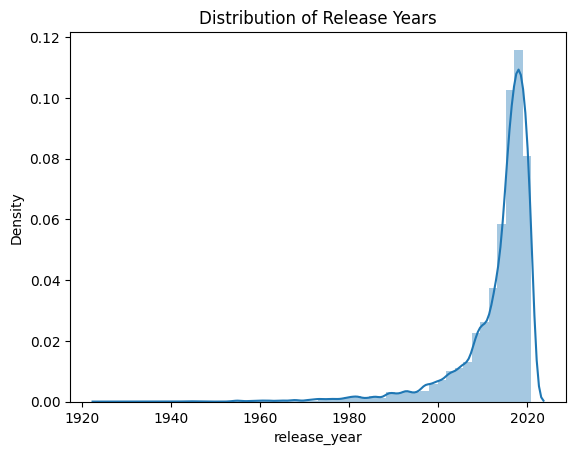

In [31]:
# General distribution of TV Shows and Movies release_years
sns.distplot(df['release_year'])
plt.title('Distribution of Release Years')
plt.show()

We can follow the below steps in order to address the concern about the **number of movies released per year** has been **changed over the last 20-30 years or not**:

1. Filter the dataset to include only movies.
2. Group the data by the 'Release_year' attribute.
3. Count the number of movies released in each year.
4. Create a line plot to visualize the trend over the last 20-30 years.

In [32]:
# Step 1: Filter the dataset to include only movies
movies_df = df[df['type'] == 'Movie']

In [33]:
# Step 2: Group the data by 'Release_year' and count the number of movies in each year
movies_per_year = movies_df.groupby('release_year').size().reset_index(name='Count')

In [34]:
movies_per_year

,release_year,Count
0,1942,3
1,1943,4
2,1944,12
3,1945,6
4,1946,1
...,...,...
68,2017,6909
69,2018,7372
70,2019,5376
71,2020,4468


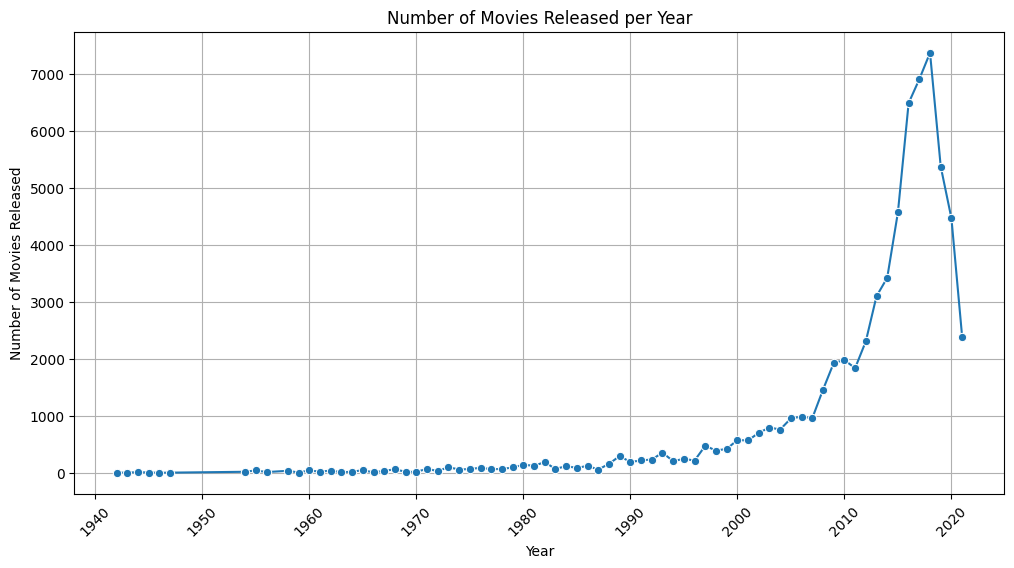

In [35]:
# Create a line plot to visualize the trend from the start year to the end year
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_per_year, x='release_year', y='Count', marker='o')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

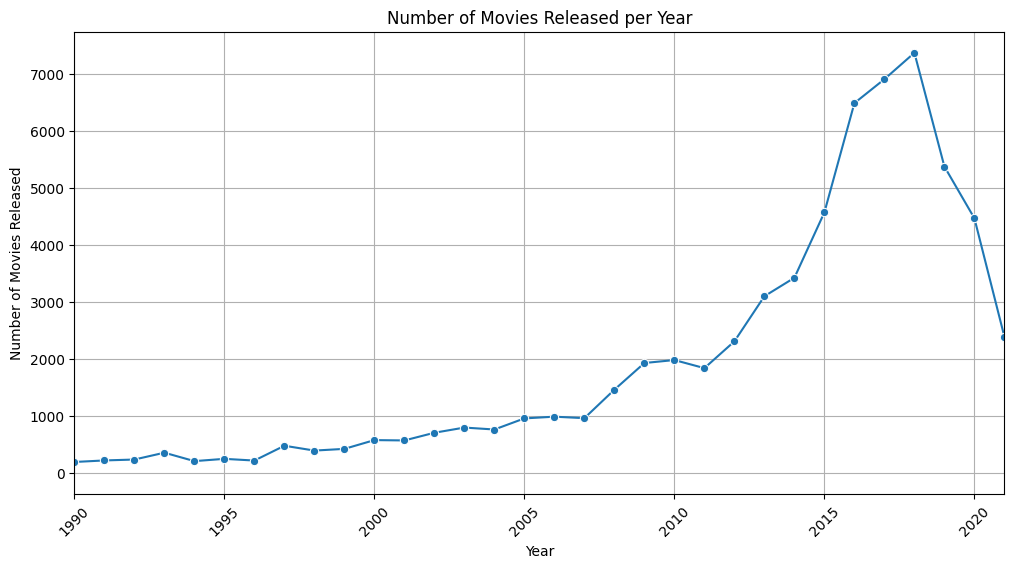

In [36]:
# Step 3: Create a line plot to visualize the trend over the last 20-30 years
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_per_year, x='release_year', y='Count', marker='o')
plt.title('Number of Movies Released per Year')
plt.xlim(left = 1990, right = 2021)     # Zooming/limiting the x-axis segment of the flot...
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observations:**

* The number of movies released per year has generally increased over the last 20-30 years. The plot shows an **upward trend** in the **count of movies released**.
* While there is a **general upward trend**, there are **fluctuations** in the **number of movies released from year to year**. Some years experience a higher number of movie releases compared to others.

**Actionable Recommendations:**

* **Capitalize on Increasing Demand:** The **increasing trend in movie** releases suggests a **growing demand for content**. Content creators and production companies can take advantage of this trend by **investing in high-quality movie productions** to meet the **increasing audience demand**.
* **Quality Over Quantity:** While the number of movie releases is increasing, the focus should remain on **maintaining the quality of content**. Investing in well-scripted, well-directed, and well-produced movies can lead to **better reception and higher viewer satisfaction**.

### **(Q3) Comparison of TV shows vs. Movies**

To perform a **comparison of TV shows vs. Movies** in terms of the number of titles produced in each country.

In [37]:
# Filter movies and TV shows separately
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

In [38]:
# Group and count unique movie titles for each country
movie_counts_by_country = movies_df.groupby('country')['title'].nunique().reset_index()
movie_counts_by_country = movie_counts_by_country.sort_values(by='title', ascending=False)

# Select top 10 countries with the most movies
top_10_movie_countries = movie_counts_by_country.head(10)
print("Top 10 countries with the most Movies:\n")
print(top_10_movie_countries)

Top 10 countries with the most Movies:

             country  title
119    United States   2751
47             India    962
117   United Kingdom    532
121  Unknown_country    440
22            Canada    319
38            France    303
40           Germany    182
105            Spain    171
55             Japan    119
25             China    114


In [39]:
# Group and count unique TV show titles for each country
tv_show_counts_by_country = tv_shows_df.groupby('country')['title'].nunique().reset_index()
tv_show_counts_by_country = tv_show_counts_by_country.sort_values(by='title', ascending=False)

# Select top 10 countries with the most TV shows
top_10_tv_show_countries = tv_show_counts_by_country.head(10)
print("Top 10 countries with the most TV shows:\n")
print(top_10_tv_show_countries)

Top 10 countries with the most TV shows:

             country  title
119    United States    938
121  Unknown_country    391
117   United Kingdom    272
55             Japan    199
103      South Korea    170
22            Canada    126
38            France     90
47             India     84
111           Taiwan     70
7          Australia     66


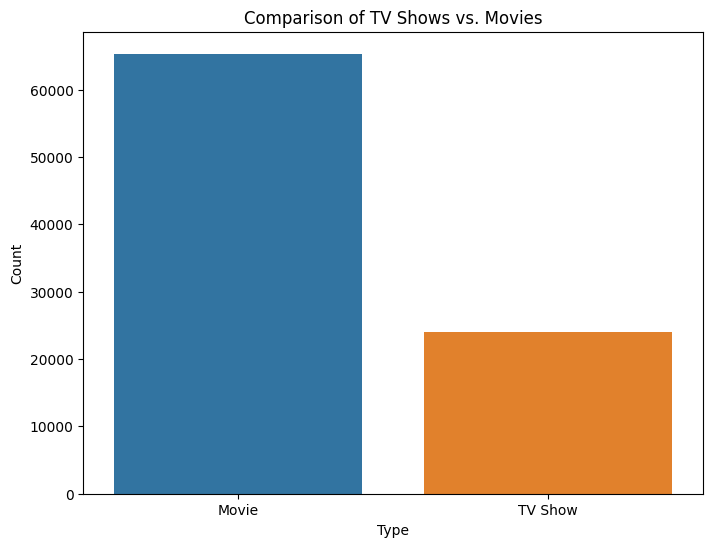

In [40]:
# Plotting a bar chart which states there are approx 6131 movies and 2676 TV Shpws are registered and telecasted on Netflix platform
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Comparison of TV Shows vs. Movies')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Observations:**

* The **bar chart** is a simple count plot **comparing the number of TV shows and movies** on the **Netflix** platform. It shows that there are **approximately 6131 movies and 2676 TV shows** registered and telecasted on **Netflix**.

**`NOTE:`** The **simple count plot** provides a basic overview of the **number of TV shows and movies** on **Netflix**. To gain more insights and make actionable recommendations, a more detailed analysis using the **stacked bar plot** could be helpful.

### **(Q4) Compare TV shows vs. Movies for top 10 countries**

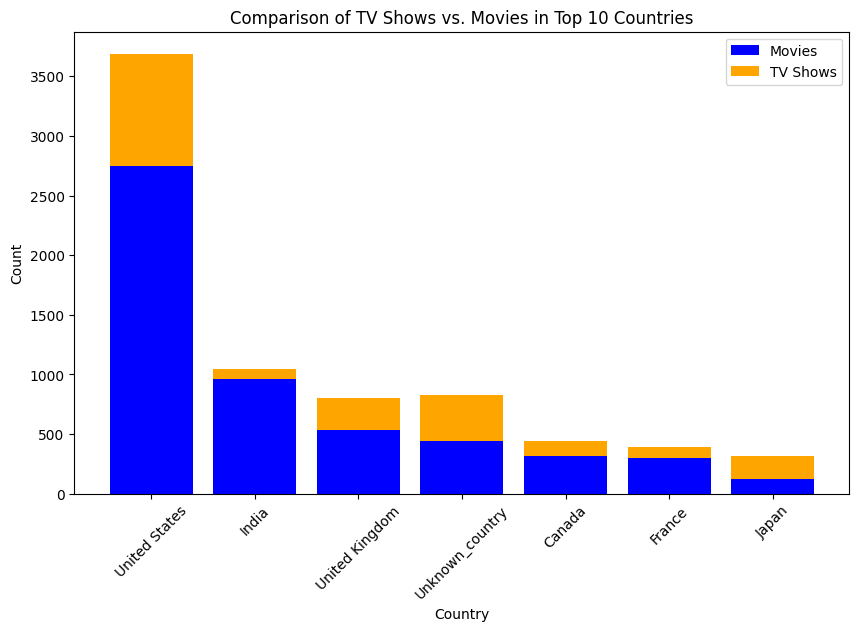

In [41]:
# Merge movie and TV show counts for top 10 countries
top_countries_data = pd.merge(top_10_movie_countries, top_10_tv_show_countries, on='country', suffixes=('_Movies', '_TV_Shows'))

# Plotting a stacked bar chart to compare TV shows vs. Movies for top 10 countries
plt.figure(figsize=(10, 6))
plt.bar(top_countries_data['country'], top_countries_data['title_Movies'], label='Movies', color='blue')
plt.bar(top_countries_data['country'], top_countries_data['title_TV_Shows'], label='TV Shows', color='orange', bottom=top_countries_data['title_Movies'])
plt.title('Comparison of TV Shows vs. Movies in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

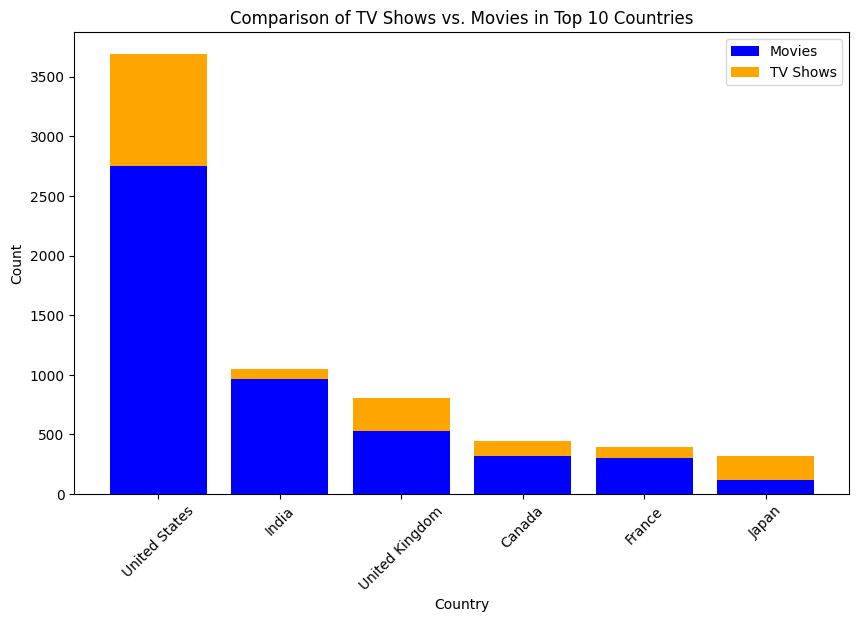

In [42]:
# Filter out the "unknown_country" value
top_10_movie_countries = top_10_movie_countries[top_10_movie_countries['country'] != 'Unknown_country']
top_10_tv_show_countries = top_10_tv_show_countries[top_10_tv_show_countries['country'] != 'Unknown_country']

# Merge movie and TV show counts for top 10 countries
top_countries_data = pd.merge(top_10_movie_countries, top_10_tv_show_countries, on='country', suffixes=('_Movies', '_TV_Shows'))

# Plotting a stacked bar chart to compare TV shows vs. Movies for top 10 countries
plt.figure(figsize=(10, 6))
plt.bar(top_countries_data['country'], top_countries_data['title_Movies'], label='Movies', color='blue')
plt.bar(top_countries_data['country'], top_countries_data['title_TV_Shows'], label='TV Shows', color='orange', bottom=top_countries_data['title_Movies'])
plt.title('Comparison of TV Shows vs. Movies in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Observations:**

* The **stacked bar plot** compares the **number of movies and TV shows** in the **top 10 countries** with the most content on **Netflix**. The bars are stacked on top of each other, representing the **count of movies and TV shows for each country**.
* **United States (US)** has the **highest number of movies and TV shows** among the top 10 countries. It is a significant market for **Netflix**, with a diverse content library.
* **India** and the **United Kingdom (UK)** are also prominent countries in terms of both **movie and TV show** offerings. These countries have a wide range of content available to their **Netflix** subscribers.

**Actionable Recommendations:**

* **Content Localization:** For countries with a **higher proportion of TV shows**, **Netflix** can consider **localizing** some of the **popular TV shows through dubbing or subtitling**. This will make the content more accessible and appealing to viewers in those regions.
* **Regional Originals:** Based on the **demand** for TV shows and movies in **specific countries**, **Netflix** can invest in **producing original content targeting those regions**. **Original content** that reflects local culture and themes can **attract a dedicated audience**.


### **(Q5) Does the duration of content vary based on ratings, and how does it differ between TV shows and Movies?**

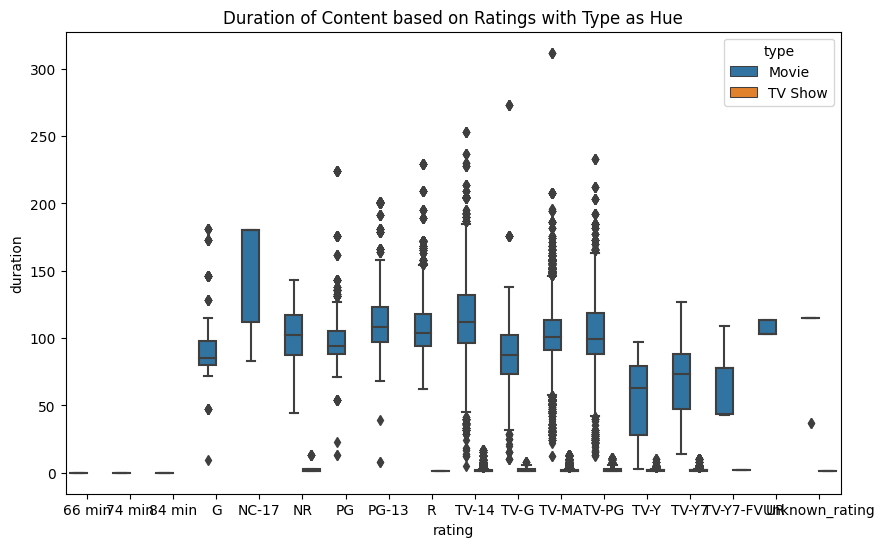

In [43]:
# Duration of content vary based on Ratings and it's difference b/w TV Shows and Movies
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='duration', hue='type', data=df)
plt.title('Duration of Content based on Ratings with Type as Hue')
plt.show()

**Observation:**

* The **box plot** shows the distribution of content duration based on ratings, with 'type' (TV Show or Movie) as a hue. It provides insights into how the **duration of content** varies for **different ratings** and between **TV shows and movies**.
* The **box plot** reveals that **TV shows** typically have a **higher duration** than **movies** for all **ratings**. The **median duration** of **TV shows** is **generally longer** than the **median duration** of **movies**, as indicated by the position of the box plots.

**Actionable Recommendation::**

* **Diversify Content Duration:** To cater to a wider audience, consider producing a **diverse range of content durations**. While **TV show**s tend to have **longer durations**, **shorter movies** can attract viewers seeking **concise entertainment**. Maintaining a mix of both short and long-form content can appeal to different preferences.
* **Tailored Content Length:** Analyze viewership data to identify which **duration ranges** are **most popular among the audience** for each rating category. This information can guide content creators in producing **TV shows and movies** that align with the **audience's preferences for specific ratings**.

### **(Q6) What is the best time to launch a TV show?**

To find the best time to launch a TV show or a movie, we will analyze the data separately for TV shows and movies to determine the best week and the best month for release. We will create new columns for week and month, then group the data accordingly to count the total number of TV shows and movies released in each week and each month.



In [44]:
df['date_added']

0      2021-09-25
1      2021-09-24
1      2021-09-24
1      2021-09-24
1      2021-09-24
          ...    
8806   2019-03-02
8806   2019-03-02
8806   2019-03-02
8806   2019-03-02
8806   2019-03-02
Name: date_added, Length: 89382, dtype: datetime64[ns]

In [45]:
# Extract the week and month from the 'date_added' column
df['Week'] = df['date_added'].dt.isocalendar().week
df['Month'] = df['date_added'].dt.month

In [46]:
# Filter TV shows
tv_shows_df = df[df['type'] == 'TV Show']

# Group and count TV shows by week
tv_shows_by_week = tv_shows_df.groupby('Week')['title'].count().reset_index()
tv_shows_by_week = tv_shows_by_week.sort_values(by='title', ascending=False)

# Group and count TV shows by month
tv_shows_by_month = tv_shows_df.groupby('Month')['title'].count().reset_index()
tv_shows_by_month = tv_shows_by_month.sort_values(by='title', ascending=False)

In [47]:
# Best week to launch a TV show
best_week = tv_shows_by_week['Week'].iloc[0]

# Best month to launch a TV show
best_month = tv_shows_by_month['Month'].iloc[0]

In [48]:
print(f"The best week to launch a TV show is Week {best_week}")
print(f"The best month to launch a TV show is Month {best_month}")

The best week to launch a TV show is Week 35
The best month to launch a TV show is Month 8.0


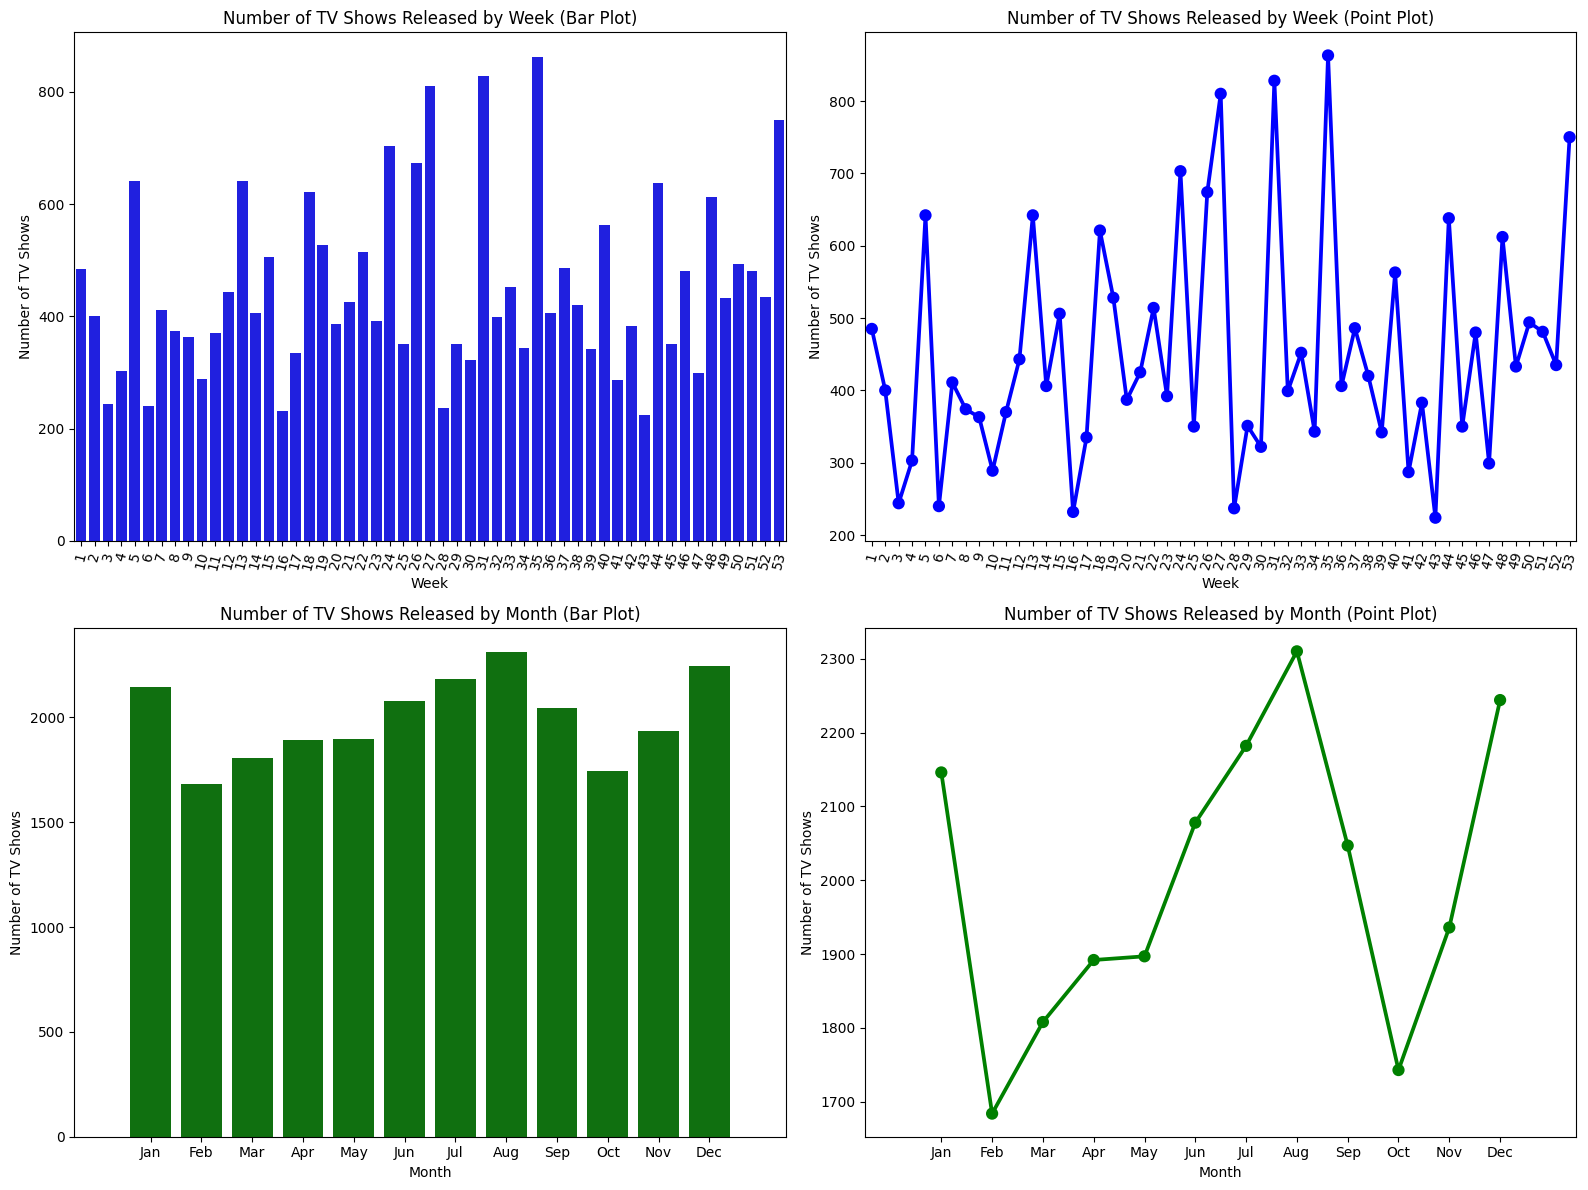

In [49]:
# Create subplots with two rows
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Subplot for TV shows released by week (bar plot)
sns.barplot(data=tv_shows_by_week, x='Week', y='title', color='b', ax=axs[0, 0])
axs[0, 0].set_title('Number of TV Shows Released by Week (Bar Plot)')
axs[0, 0].set_xlabel('Week')
axs[0, 0].set_ylabel('Number of TV Shows')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=75)    # Rotate x-axis labels in the 0th row (bar plot)

# Subplot for TV shows released by week (point plot)
sns.pointplot(data=tv_shows_by_week, x='Week', y='title', color='b', ax=axs[0, 1])
axs[0, 1].set_title('Number of TV Shows Released by Week (Point Plot)')
axs[0, 1].set_xlabel('Week')
axs[0, 1].set_ylabel('Number of TV Shows')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=75)     # Rotate x-axis labels in the 0th row (point plot)

# Subplot for TV shows released by month (bar plot)
sns.barplot(data=tv_shows_by_month, x='Month', y='title', color='g', order=range(0, 14), ax=axs[1, 0])
axs[1, 0].set_title('Number of TV Shows Released by Month (Bar Plot)')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of TV Shows')
axs[1, 0].set_xticks(range(1, 13))
axs[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Subplot for TV shows released by month (point plot)
sns.pointplot(data=tv_shows_by_month, x='Month', y='title', color='g', order=range(0, 14), ax=axs[1, 1])
axs[1, 1].set_title('Number of TV Shows Released by Month (Point Plot)')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Number of TV Shows')
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observations:**

Based on the **bar plots** and **point plots**, we can make the following observations:

* The code identifies the **week with the highest number of TV show releases**, labeled as **"best_week"**. This **week** is displayed in both the **bar plot** and **point plot** for **TV shows released by week**.
* The code also identifies the **month with the highest number of TV show releases**, labeled as **"best_month"**. This **month** is displayed in both the **bar plot** and **point plot** for **TV shows released by month**.

**Actionable Recommendations:**

* **High Activity Period:** The identified **"best_week"** and **"best_month"** represent **periods of high activity** in terms of **TV show releases**. To capitalize on this, content creators and **Netflix** can plan to **launch their new TV shows during these weeks or months** to gain **maximum visibility and viewership**.
* **Seasonal Trends:** Analyzing the **TV show releases by month** can help identify potential **seasonal trends**. Content creators can align TV shows with specific themes or genres to match **seasonal preferences**, increasing the chances of success.
* **Avoiding Competitive Periods:** While launching TV shows during high activity periods is beneficial, it's essential to **avoid periods** when numerous popular TV shows are already being released. Competition can reduce visibility and affect viewership. Therefore, content creators can **strategize the release dates** to **avoid clashes with major TV show premieres**.


### **(Q7) Analysis of actors/directors of different types of shows/movies**

To analyze the **top 10 actors and directors** who have **appeared** in the **most movies or TV shows**, we will group the data by each actor and director separately and then count the number of unique titles (TV shows/movies) associated with each of them. We will create two separate bar plots to visualize the results.



In [50]:
# Filter out rows with 'unknown' cast
df_movies = df[df['type'] == 'Movie']
df_movies = df_movies[df_movies['cast'] != 'Unknown_cast']

# Grouping the data by actors and counting the number of unique movie titles for each actor
actor_movie_counts = df_movies.groupby('cast')['title'].nunique().reset_index()

# Sorting the actors in descending order of movie counts and selecting the top 10
top_10_actors_movies = actor_movie_counts.sort_values(by='title', ascending=False).head(10)

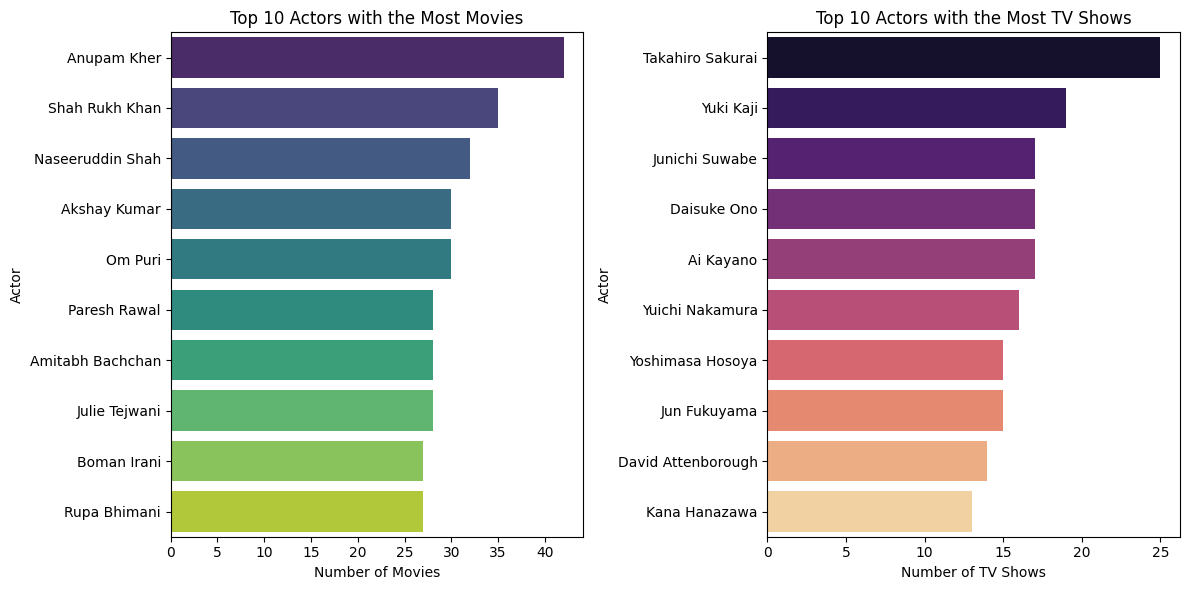

In [51]:
# Create a subplot for the top 10 actors with the most movies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_actors_movies, x='title', y='cast', palette='viridis')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')

# For actors who have appeared in the most TV shows:

# Filter out rows with 'unknown' cast
df_tv_shows = df[df['type'] == 'TV Show']
df_tv_shows = df_tv_shows[df_tv_shows['cast'] != 'Unknown_cast']

# Grouping the data by actors and counting the number of unique TV show titles for each actor
actor_tv_show_counts = df_tv_shows.groupby('cast')['title'].nunique().reset_index()

# Sorting the actors in descending order of TV show counts and selecting the top 10
top_10_actors_tv_shows = actor_tv_show_counts.sort_values(by='title', ascending=False).head(10)

# Create a subplot for the top 10 actors with the most TV shows
plt.subplot(1, 2, 2)
sns.barplot(data=top_10_actors_tv_shows, x='title', y='cast', palette='magma')
plt.title('Top 10 Actors with the Most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Actor')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observations:**

Based on the **bar plots** for **actors** , we can make the following observations.

* **Top 10 Actors with the Most Movies:** We can see that the actor **"Anupam Kher"** with the **most movie appearances** is shown at the top of the plot along with the color palette 'viridis' which is used to differentiate the bars of camparision with other actors.
* **Top 10 Actors with the Most TV Shows:** The actor **"Takahiro Sakurai"** with the **most TV show appearances** is shown at the top of the plot. The color palette 'magma' is used to differentiate the bars.

In [52]:
# Filter out rows with 'unknown' directors
df_movies = df[df['type'] == 'Movie']
df_movies = df_movies[df_movies['director'] != 'Unknown_director']

# Grouping the data by directors and counting the number of unique movie titles for each director
director_movie_counts = df_movies.groupby('director')['title'].nunique().reset_index()

# Sorting the directors in descending order of movie counts and selecting the top 10
top_10_directors_movies = director_movie_counts.sort_values(by='title', ascending=False).head(10)

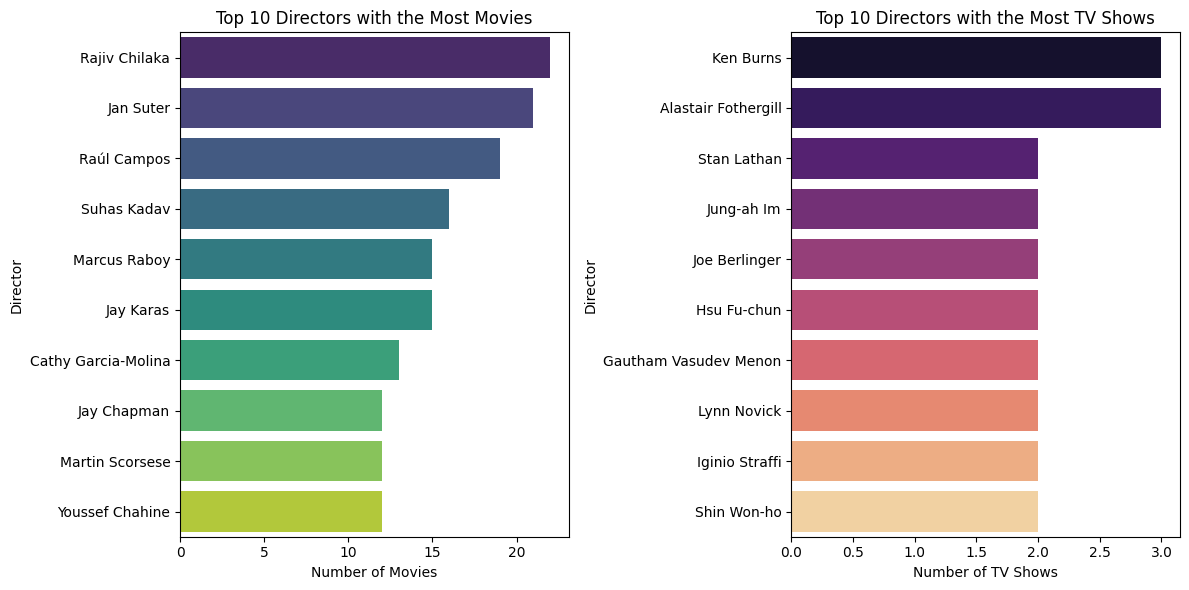

In [53]:
# Create a subplot for the top 10 directors with the most movies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_directors_movies, x='title', y='director', palette='viridis')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')

# For directors who have appeared in the most TV shows:

# Filter out rows with 'unknown' directors
df_tv_shows = df[df['type'] == 'TV Show']
df_tv_shows = df_tv_shows[df_tv_shows['director'] != 'Unknown_director']

# Grouping the data by directors and counting the number of unique TV show titles for each director
director_tv_show_counts = df_tv_shows.groupby('director')['title'].nunique().reset_index()

# Sorting the directors in descending order of TV show counts and selecting the top 10
top_10_directors_tv_shows = director_tv_show_counts.sort_values(by='title', ascending=False).head(10)

# Create a subplot for the top 10 directors with the most TV shows
plt.subplot(1, 2, 2)
sns.barplot(data=top_10_directors_tv_shows, x='title', y='director', palette='magma')
plt.title('Top 10 Directors with the Most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Director')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observations:**

Based on the **bar plots** for **directors** , we can make the following observations.

* **Top 10 Directors with the Most Movies:** The director with the **most movie appearances** is **"Rajiv Chilaka"** as shown at the top of the plot along with the color palette 'viridis' which is used to differentiate the bars.
* **Top 10 Directors with the Most TV Shows:** Likewise, **"Ken Burns"** is the directors listed with the **most TV show appearances** is shown at the top of the plot. The color palette 'magma' is used to differentiate the bars.

**Actionable Recommendation for Actors & Directors:**

* **Leveraging Popular Actors & Directors:** Based on the analysis of **top actors & directors** with the **most movie and TV show appearances**, **Netflix** can consider **collaborations and partnerships with popular actors** or with **collaborating with top directors** to attract a broader audience. Including well-known actors or directors in original productions can lead to increased viewership.
* **Content Curation:** **Netflix** can curate **special collections featuring movies and TV shows** starring the **top actors and directed by the top directors**. This curated content can be promoted to subscribers based on their viewing preferences and history.

### **(Q8) Does Netflix has more focus on TV Shows than movies in recent years**

To determine if **Netflix** has **more focus on TV shows than movies in recent years**, we can analyze the trend of TV shows and movies added to the platform over time. We will group the data by the 'Type' (TV Show or Movie) and 'Year' to count the number of TV shows and movies added each year. Then, we will plot the results to visualize the trend.



In [54]:
# Extract the year from the 'date_added' column
df['Year'] = df['date_added'].dt.year

In [55]:
# Filter the dataset for TV shows and movies separately
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

In [56]:
# Count the total number of TV shows and movies added each year
tv_shows_by_year = tv_shows_df.groupby('Year')['type'].count().reset_index(name='TV Show Count')
movies_by_year = movies_df.groupby('Year')['type'].count().reset_index(name='Movie Count')

In [57]:
print(tv_shows_by_year)

     Year  TV Show Count
0  2008.0              1
1  2013.0             48
2  2014.0             66
3  2015.0            238
4  2016.0           1791
5  2017.0           2878
6  2018.0           3365
7  2019.0           5100
8  2020.0           5754
9  2021.0           4726


In [58]:
print(movies_by_year)

      Year  Movie Count
0   2008.0            6
1   2009.0           18
2   2010.0           10
3   2011.0          200
4   2012.0           27
5   2013.0           33
6   2014.0          223
7   2015.0          675
8   2016.0         2295
9   2017.0         7970
10  2018.0        11950
11  2019.0        15420
12  2020.0        14844
13  2021.0        11675


In [59]:
# Merge the counts of TV shows and movies into a single DataFrame
counts_by_year = pd.merge(tv_shows_by_year, movies_by_year, on='Year', how='outer')
counts_by_year.fillna(0, inplace=True)  # Fill NaN values with 0 for years with no TV shows/movies

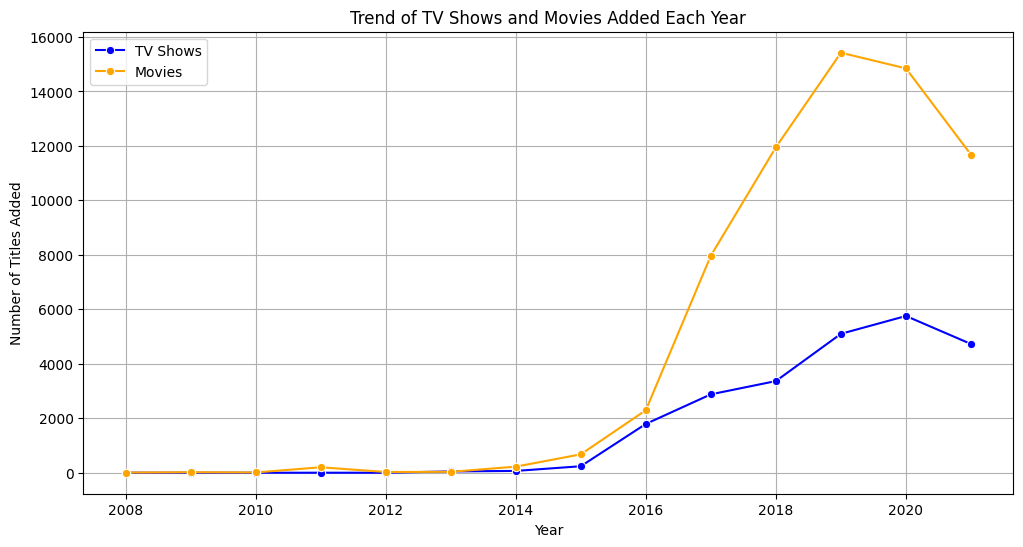

In [60]:
# Plotting the trend of TV shows and movies added each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=counts_by_year, x='Year', y='TV Show Count', marker='o', label='TV Shows', color='blue')
sns.lineplot(data=counts_by_year, x='Year', y='Movie Count', marker='o', label='Movies', color='orange')
plt.title('Trend of TV Shows and Movies Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

* The **blue & orange lines** represents the **trend of TV shows & Movies added each year**. The line plot shows how the number of TV shows & Movies added to **Netflix** has changed over time.
* By comparing the **trends of TV shows and movies**, we can observe if there has been a shift in **Netflix's focus** towards one type of content in recent years.

**Actionable Recommendation:**

* **Content Strategy:** The trend analysis can help **Netflix** in formulating its content strategy. If the **number of TV Shows added** is consistently **higher than Movies**, it suggests a strong demand for **TV Shows** among subscribers. **Netflix** can focus on acquiring and producing more **TV Shows** to meet this demand.
* **Audience Preferences:** Analyzing the viewership and engagement data for TV shows and movies can provide insights into audience preferences. **Netflix** can use this data to **curate content** that resonates well with its subscribers.
* **Balancing Content Library:** While focusing on Movies can be beneficial, it's essential to maintain a **balanced content library** that caters to diverse viewer preferences. **Netflix** can aim for a **mix of both TV shows and movies to cater to a wider audience base**.

### **(Q9) Understanding what content is available in different countries**

To understand what content is available in different countries, we can analyze the dataset by grouping the data based on the 'Country' attribute and then count the number of TV shows and movies available in each country. This will give us insights into the distribution of content across different regions.


In [61]:
# Extracting the count of the occurrences of each unique Country
df['country'].value_counts()

United States      30471
India               8537
United Kingdom      5713
Unknown_country     5421
Canada              3946
                   ...  
Afghanistan            1
Samoa                  1
Sri Lanka              1
Palestine              1
Panama                 1
Name: country, Length: 128, dtype: int64

In [62]:
# Extracting the count of the occurrences of each unique title
df['title'].value_counts()

Movie 43                               468
Kahlil Gibran's The Prophet            350
Holidays                               252
The Eddy                               208
Navarasa                               198
                                      ... 
ANIMA                                    1
Mary Portas: Secret Shopper              1
Deaf U                                   1
Super Monsters: Dia de los Monsters      1
Dick Johnson Is Dead                     1
Name: title, Length: 8807, dtype: int64

In [63]:
# Group the data by 'country' and count the number of unique titles in each country
content_by_country = df.groupby('country')['title'].nunique().reset_index()
content_by_country

,country,title
0,,2
1,Afghanistan,1
2,Albania,1
3,Algeria,3
4,Angola,1
...,...,...
123,Vatican City,1
124,Venezuela,4
125,Vietnam,7
126,West Germany,5


In [64]:
# Sorting the data in descending order of content availability
content_by_country = content_by_country.sort_values(by='title', ascending=False)
content_by_country

,country,title
119,United States,3689
47,India,1046
121,Unknown_country,831
117,United Kingdom,804
22,Canada,445
...,...,...
101,Somalia,1
70,Mongolia,1
34,Ecuador,1
33,East Germany,1


In [65]:
# Print the top 10 countries with the most content
print(content_by_country.head(10))

             country  title
119    United States   3689
47             India   1046
121  Unknown_country    831
117   United Kingdom    804
22            Canada    445
38            France    393
55             Japan    318
105            Spain    232
103      South Korea    231
40           Germany    226


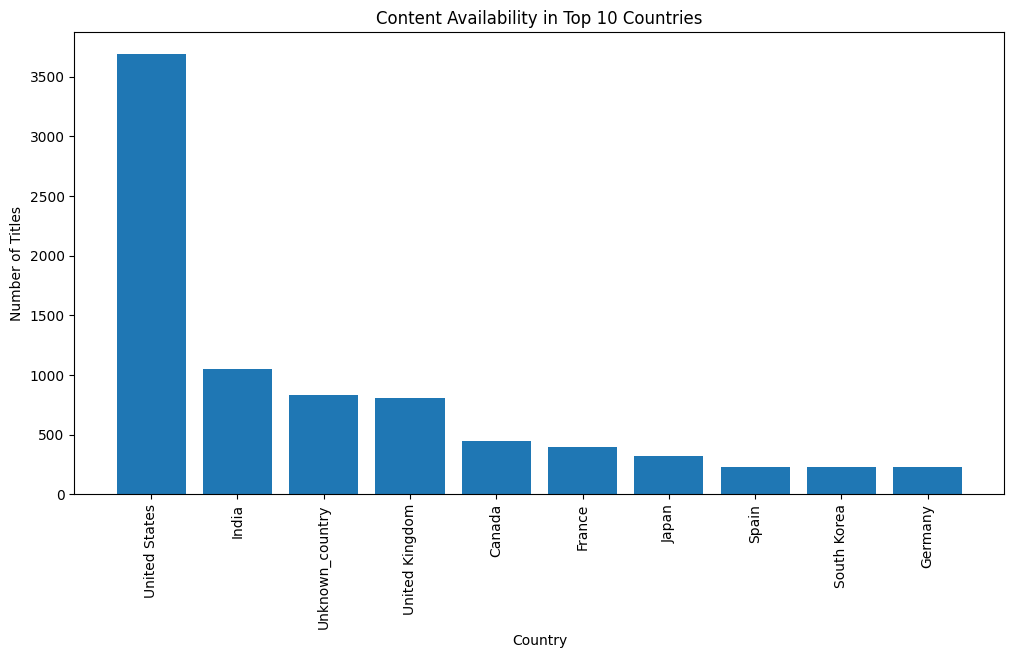

In [66]:
# Plotting the top 10 countries with the most content (bar plot)
plt.figure(figsize=(12, 6))
plt.bar(content_by_country['country'][:10], content_by_country['title'][:10])
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Content Availability in Top 10 Countries')
plt.xticks(rotation=90)
plt.show()

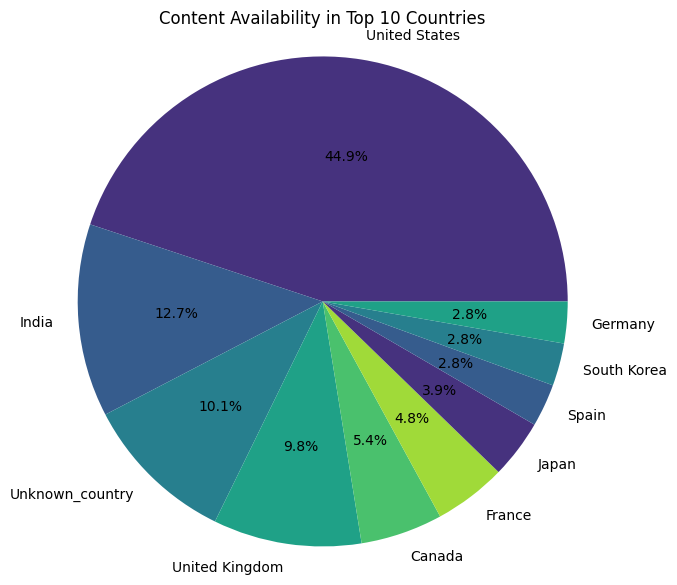

In [67]:
# Plotting the top 10 countries with the most content (pie chart)
plt.figure(figsize=(8, 7))
plt.pie(content_by_country['title'][:10], labels=content_by_country['country'][:10], autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Content Availability in Top 10 Countries')
plt.axis('equal')
plt.show()

**Observation:**

* The **bar plot** displays the **number of titles** available in the **top 10 countries** with the **most content**. Each bar represents a country, and its height represents the number of unique titles available in that country.
* The **pie chart** illustrates the **distribution of content** availability among the **top 10 countries**. Each slice represents a country, and its size corresponds to the proportion of content available in that country relative to the total content in the top 10 countries.

**Actionable Recommendations:**

* **Content Localization:** Identifying the **countries with the most conten**t allows **Netflix** to tailor its **content localization** efforts. By offering a diverse range of titles in the most prominent countries, **Netflix** can **attract and retain a larger audience in those regions**.
* **Targeted Marketing:** Understanding **content availability** in **different countries** helps **Netflix** target its **marketing efforts** effectively. **Customized marketing campaigns** can be designed to promote content based on regional preferences and demand.
* **Content Acquisition and Licensing:** For countries with limited content availability, **Netflix** can focus on acquiring more titles to cater to the **local audience**. **Licensing agreements** with **local production houses and content creators** can also help in **diversifying the content librar**y.
* **Market Expansion Opportunities:** Countries with a **high demand for content but limited availability** may present **market expansion** opportunities for **Netflix**. Analyzing content preferences and trends in such countries can guide **strategic decisions for international expansion**.









### **(Q10) Which genre movies are more popular or produced more**

**`Hint:`** We want you to apply the **word cloud** on the **genre** columns to know which kind of **genre** is produced

To identify which **genre** of **movies** is **more popular or produced mor**e, we can create a **word cloud** to visualize the frequency of different genres in the dataset. A **word cloud** is a **graphical representation of word frequencies, where the size of each word corresponds to its frequency** in the dataset.



In [68]:
from wordcloud import WordCloud

In [69]:
# Combine all the genres into a single string
all_genres = ' '.join(df['listed_in'])

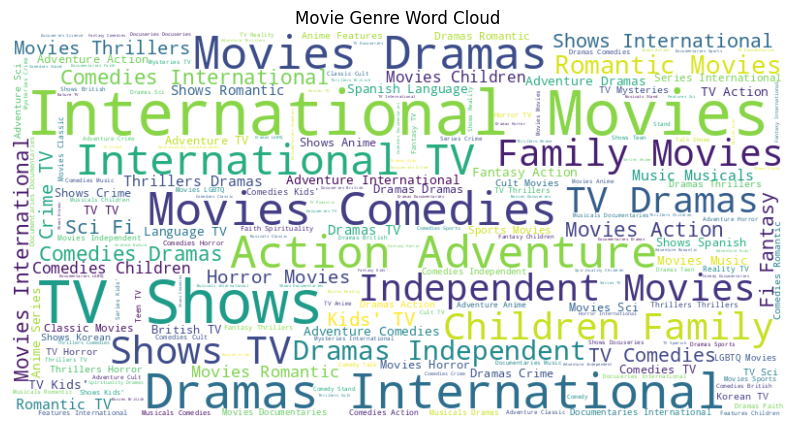

In [70]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Movie Genre Word Cloud')
plt.axis('off')
plt.show()

**Observation:**

* The provided code creates a **word cloud** visualization based on the **movie genres** available in the **Netflix** dataset. A **word cloud** here represents the **popularity or frequency of different movie genres**.

**Actionable Recommendations:**

* **Content Curation:** In this case we can see that dramas, actions, adventure, comedies and family movies are some of the most popular genres world wide. Hence, understanding the **most popular genres** can guide **Netflix** in curating their content to cater to **diverse audience preferences**.

# **(5) Final Recommendations**
***

**"Netflix"** is a leading **global streaming entertainment service**, offering a wide variety of TV shows, movies, documentaries, and original content to subscribers **worldwide**.

After having a complete analysis of the **Netflix** dataset, some of the key **actionable recommendations** are shown below:

* **Content Balance:** Maintain a balanced mix of both movies and TV shows to cater to diverse audience preferences.
* **Targeting Different Age Groups:** Produce content for different age groups to expand viewership.
* **Capitalize on Increasing Demand:** Invest in high-quality movie productions to meet growing audience demand.
* **Content Localization and Regional Originals:** Localize popular TV shows and produce original content targeting specific regions to attract dedicated audiences.
* **High Activity Period and Seasonal Trends:** Plan TV show launches during periods of high activity and align shows with seasonal preferences to maximize viewership.
* **Leveraging Popular Actors & Directors:** Collaborate with popular actors and directors to attract a broader audience.
* **Audience Preferences:** Analyze viewership data to curate content that resonates well with subscribers.
* **Content Acquisition and Licensing**: Focus on acquiring more titles for countries with limited content availability and explore licensing agreements with local content creators.
* **Market Expansion Opportunities:** Analyze content preferences in countries with high demand but limited availability for potential market expansion.
* **Genre Popularity:** Focus on popular genres like dramas, actions, adventure, comedies, and family movies for content curation.

By implementing these recommendations, **Netflix** can optimize its content strategy, improve viewer engagement, and expand its global reach by catering to various regional and demographic preferences.